<H1>Skimage Basic Course

In [5]:
from skimage import io,data
from skimage import color
import matplotlib.pyplot as plt

<h2>1. Load

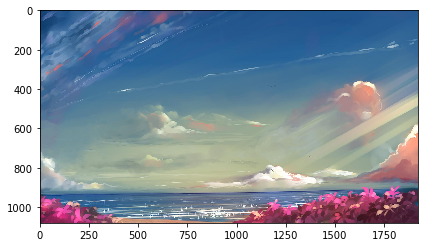

In [9]:
picpath = r"images\1.jpg"
img = io.imread(picpath)
# 转化为灰度图像
# img = io.imread(picpath, as_gray=True)
io.imshow(img)

<h2>2. Save</h2>
io.imsave(filepath,format)

<h2>3. Basic Information<h2>

In [6]:
print(type(img))  #显示类型(不同库导出图片格式不同)
print(img.shape)  #显示尺寸(图片宽度,图片高度,图片通道数)
print(img.size)   #显示总像素个数
print(img.max())  #最大像素值
print(img.min())  #最小像素值
print(img.mean()) #像素平均值

<class 'numpy.ndarray'>
(1080, 1920, 3)
6220800
255
0
130.54513808513374


<h2>4. Access and modification</h2>
图片读入程序中后，是以numpy数组存在的。因此对numpy数组的一切功能，对图片也适用。对数组元素的访问，实际上就是对图片像素点的访问。
<br>彩色图片访问方式为：
img[i,j,c]
<br>i表示图片的行数，j表示图片的列数，c表示图片的通道数（RGB三通道分别对应0，1，2）。坐标是从左上角开始。
<br>灰度图片访问方式为：
gray[i,j]
<br>除了对像素进行读取，也可以采用同样的方式修改像素值。

<h2>Instance1 BW img

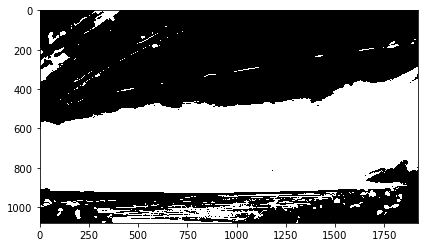

In [10]:
img_gray = io.imread(picpath, as_gray=True) # 生成灰度图像
rows, cols = img_gray.shape
img_bw = img_gray
for i in range(rows):
    for j in range(cols):
        if (img_gray[i, j] <= 0.5):
            img_bw[i, j] = 0
        else:
            img_bw[i, j] = 1
io.imshow(img_bw)

<h2>5. Basic Operation
<h3>1)Resize

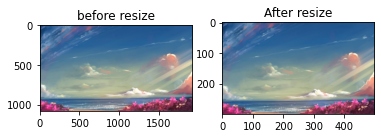

In [7]:
from skimage import transform
# <ndarray> = transform.resize(<ndarray>, (long, high))
dst = transform.resize(img, (300, 500))
plt.figure('resize')
plt.subplot(121)
plt.title('before resize')
plt.imshow(img,plt.cm.gray)
plt.subplot(122)
plt.title('After resize')
plt.imshow(dst,plt.cm.gray)
plt.show()

<h2>2)Cut

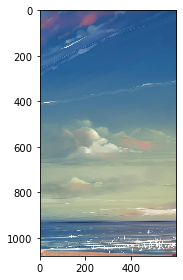

In [18]:
img_cut = img[:, 400:1000, :]
io.imshow(img_cut)

<h2>3)Rescale

(<matplotlib.image.AxesImage at 0x1cf845aaaf0>, (540, 960, 3))

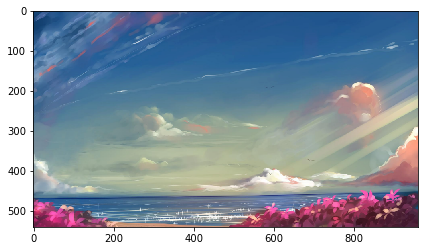

In [31]:
img_05 = transform.rescale(img, 0.5, multichannel=True)
# multichannel 锁定颜色通道，防止颜色通道随着像素改变
io.imshow(img_05), img_05.shape

<h2>4)Rotate

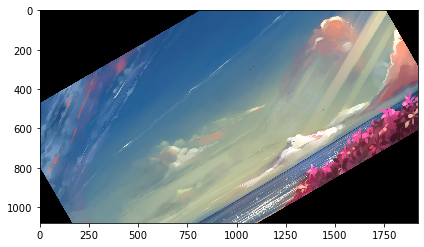

In [34]:
# 旋转30°并保留原图大小
img_30 = transform.rotate(img, 30, resize=False)
io.imshow(img_30)

<h2>5)Contrast ratio
</h2>There are four methods to modify with two introduced here.
<br>a）gamma adjust

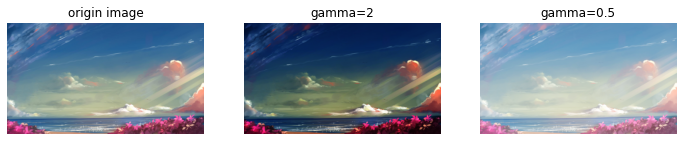

In [66]:
from skimage import exposure, img_as_float
gam1= exposure.adjust_gamma(img, 2)   #调暗
gam2= exposure.adjust_gamma(img, 0.5)  #调亮
plt.figure('adjust_gamma',figsize=(12,12))

plt.subplot(131)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
plt.axis('off')

plt.subplot(132)
plt.title('gamma=2')
plt.imshow(gam1,plt.cm.gray)
plt.axis('off')

plt.subplot(133)
plt.title('gamma=0.5')
plt.imshow(gam2,plt.cm.gray)
plt.axis('off')

plt.show()

b) Auto adjust

(array([[[ 51, 102, 153],
         [ 22,  34,  56]],
 
        [[132, 133,  44],
         [ 12,  34,  55]]], dtype=uint8),
 array([[[ 70, 162, 255],
         [ 18,  39,  79]],
 
        [[217, 218,  57],
         [  0,  39,  77]]], dtype=uint8))

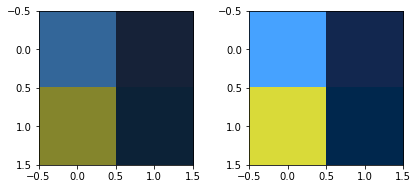

In [80]:
img_crea = np.array([[[51, 102, 153], [22, 34, 56]],
                        [[132, 133, 44], [12, 34, 55]]
], dtype=np.uint8)
img_adju =exposure.rescale_intensity(img_crea)
plt.subplot(121)
io.imshow(img_crea)
plt.subplot(122)
io.imshow(img_adju)
img_crea, img_adju

<h2>6. Image Collection

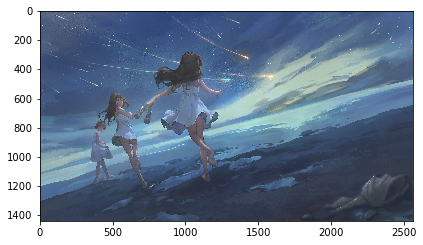

In [5]:
picstr=  'images/*.jpg'
coll = io.ImageCollection(picstr)
io.imshow(coll[2]) 

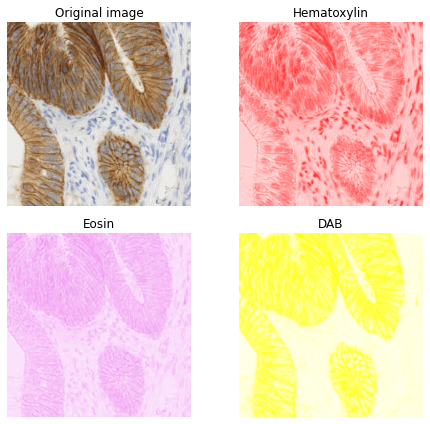

In [12]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the original one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'red'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'yellow'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['violet',
                                               'white'])

ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()